## Лабораторная работа №3
### Исследование распределений и моментов связанных с преобразованием случайных величин

---

Задание. Сгенерировать выборку точек, равномерно распределенных внутри круга двумя способами:
1. Равномерно распределить точки внутри квадрата, внутрь которого вписана окружность, и отфильтровать точки, лежащие за пределами окружности.
2. Генерировать точки путем задания случайного угла и расстояния от центра окружности.

Радиус окружности R=10, размер выборки 1000 точек.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Определение плотности распределения
def pdf(k, rnd_list):
    pdf_x = []  
    pdf_y = []
    n = len(rnd_list)
    h = (max(rnd_list) - min(rnd_list)) / k
    a = min(rnd_list)
    for i in range(0, k):
        count = 0
        for j in rnd_list:
            if (a + i * h) < j < (a + (i * h) + h):
                count = count + 1
        pdf_x.append(a + i * h + h / 2)
        pdf_y.append(count / (n * h))
    d = {'x': pdf_x, 'y': pdf_y}
    return d

In [3]:
N = 1000
R = 10
square_x = [-R, R, R, -R, -R]
square_y = [-R, -R, R, R, -R]
circle_angels = np.linspace(0, 2*math.pi, 100)
circle_x = R * np.cos(circle_angels)
circle_y = R * np.sin(circle_angels)

In [4]:
def generate_points_square(n, r):
    i = 0
    points = np.empty([n, 2])
    while i < n:
        x = np.random.uniform(-r, r)
        y = np.random.uniform(-r, r)
        if (x ** 2 + y ** 2) <= (r ** 2):
            points[i][0] = x
            points[i][1] = y
            i += 1
    return points
def generate_points_polar(n, r):
    points = np.empty([n, 2])
    for i in range(0, n):
        alpha = np.random.uniform(0, 2 * math.pi)
        rr = np.random.uniform(0, r)
        x = rr * math.cos(alpha)
        y = rr * math.sin(alpha)
        points[i][0] = x
        points[i][1] = y
    return points

---

Для созданных выборок сделать следующее:
1. Создать рисунок, иллюстрирующий расположение точек сгенерированной выборки внутри окружности;
2. Найти выборочные средние координат точек и их дисперсию;
3. Построить график плотности распределения расстояния от случайной равномерно распределенной точки в круге до фиксированной точки лежащей вне окружности (к примеру, с координатами X=20, Y=0).
4. Построить график плотности распределения расстояния между двумя случайными точками, равномерно расположенными внутри круга.

---

In [5]:
points_squared = generate_points_square(N, R)
points_squared

array([[ 4.6048026 ,  4.2943046 ],
       [ 9.07192744,  2.84324438],
       [-0.24664818,  1.10412902],
       ...,
       [-1.46494037, -7.90910349],
       [ 7.24349265, -0.90861432],
       [ 2.76864807, -8.60741276]])

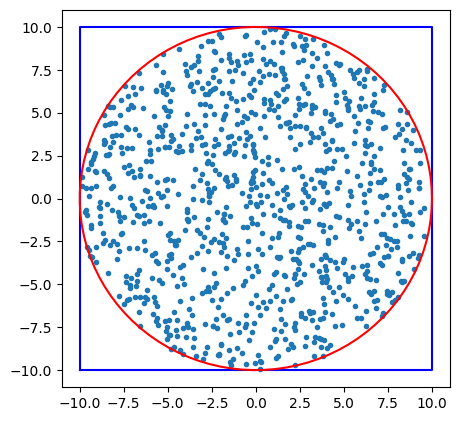

In [6]:
plt.figure(dpi=100, figsize=(5,5))
plt.plot(points_squared[:, 0], points_squared[:, 1], '.')
plt.plot(square_x, square_y, 'b-')
plt.plot(circle_x, circle_y, 'r')

In [7]:
points_polar = generate_points_polar(N, R)

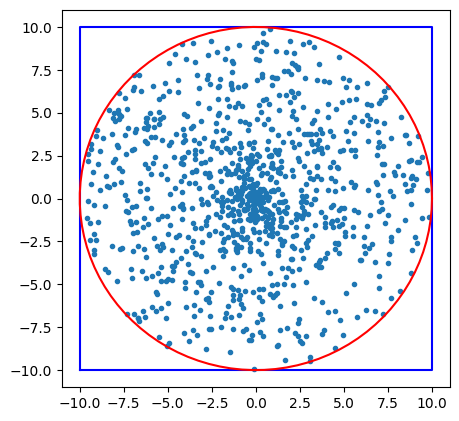

In [8]:
plt.figure(dpi=100, figsize=(5,5))
plt.plot(points_polar[:, 0], points_polar[:, 1], '.')
plt.plot(square_x, square_y, 'b-')
plt.plot(circle_x, circle_y, 'r')

---

In [9]:
print("Выборочное среднее для первого типа точек: {}".format(np.mean(points_squared)))
print("Дисперсия для первого типа точек: {}".format(np.var(points_squared)))

Выборочное среднее для первого типа точек: 0.03900650890728362
Дисперсия для первого типа точек: 24.75491152923356


In [10]:
print("Выборочное среднее для второго типа точек: {}".format(np.mean(points_polar)))
print("Дисперсия для второго типа точек: {}".format(np.var(points_polar)))

Выборочное среднее для второго типа точек: 0.011041013970005224
Дисперсия для второго типа точек: 16.93516829227223


---

In [11]:
def distance(x1, x2):
    return math.sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)

In [12]:
def random_distance_to_point(data, point):
    n = data[:, 0].size
    return_data = np.empty([n])
    for i in range(0, n):
        x = data[i][0]
        y = data[i][1]
        val = distance(data[i], point)
        return_data[i] = val
    return return_data

In [13]:
point = [15, 0]
rd1 = random_distance_to_point(points_squared, point)
rd2 = random_distance_to_point(points_polar, point)
pdf1 = pdf(40, rd1)
pdf2 = pdf(40, rd2)

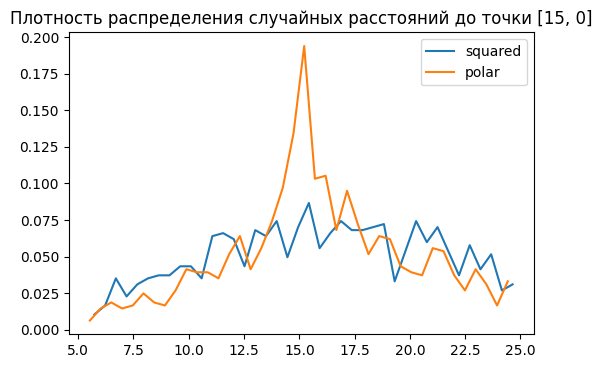

In [14]:
plt.figure(dpi=100)
plt.title("Плотность распределения случайных расстояний до точки [{}, {}]".format(point[0], point[1]))
plt.plot(pdf1['x'], pdf1['y'], label='squared')
plt.plot(pdf2['x'], pdf2['y'], label='polar')
plt.legend()
plt.show()

---

In [15]:
def random_distance_between_points(data):
    n = data[:, 0].size
    return_data = np.empty([int(n/2)])
    i = 0
    j = 0
    while i < n:
        val = distance(data[i], data[i+1])
        return_data[j] = val
        j += 1
        i += 2
    return return_data

In [16]:
rdb1 = random_distance_between_points(points_squared)
rdb2 = random_distance_between_points(points_polar)
pdf1 = pdf(40, rdb1)
pdf2 = pdf(40, rdb2)

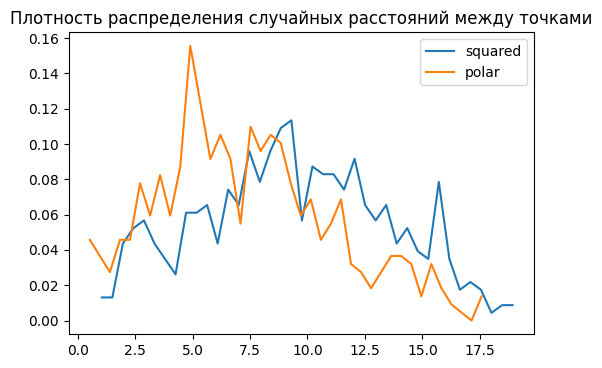

In [17]:
plt.figure(dpi=100)
plt.title("Плотность распределения случайных расстояний между точками")
plt.plot(pdf1['x'], pdf1['y'], label='squared')
plt.plot(pdf2['x'], pdf2['y'], label='polar')
plt.legend()
plt.show()